# Sklearn

# sklearn.datasets

документация: http://scikit-learn.org/stable/datasets/

In [1]:
from sklearn import datasets

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Генерация выборок

**Способы генерации данных:** 
* make_classification - построить dataset общего вида
* make_regression
* make_circles - генерирует "красивый набор данных" для построения графиков
* make_checkerboard
* etc

### datasets.make_circles

In [35]:
circles = datasets.make_circles()

print ("features:\n {}".format(circles[0][:10]))
print ("target:\n {}".format(circles[1][:10]))

features:
 [[-0.06279052  0.99802673]
 [-0.63742399 -0.77051324]
 [-0.30901699 -0.95105652]
 [ 0.42866144 -0.67546234]
 [ 0.53582679  0.84432793]
 [-0.63742399  0.77051324]
 [ 0.18738131  0.98228725]
 [-0.96858316 -0.24868989]
 [-0.74382119 -0.29449964]
 [ 0.70104534  0.38540294]]
target:
 [0 0 0 1 0 0 0 0 1 1]


Нарисуем dataset

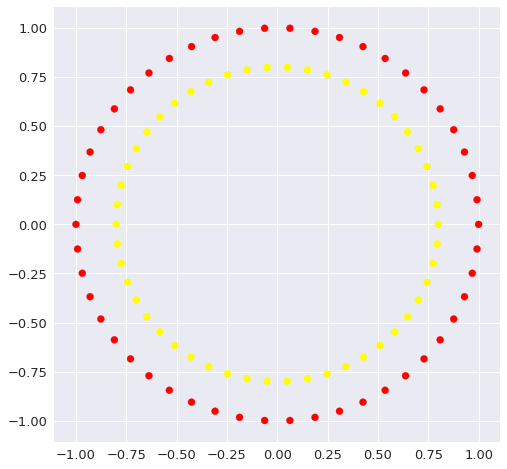

In [36]:
from matplotlib.colors import ListedColormap

colors = ListedColormap(['red', 'yellow']) #0 - красные, 1 - желтые

pyplot.figure(figsize(8, 8))
pyplot.scatter(list(map(lambda x: x[0], circles[0])), # Ox
               list(map(lambda x: x[1], circles[0])), # Oy
               c = circles[1], #классы
               cmap = colors) #цвета по классам

Обернём это в функцию, чтобы рисовать выборки в дальнейшем

In [7]:
def plot_2d_dataset(data, colors):
    pyplot.figure(figsize(8, 8))
    pyplot.scatter(list(map(lambda x: x[0], data[0])),
                   list(map(lambda x: x[1], data[0])),
                   c = data[1],
                   cmap = colors)

Пример добавления шума

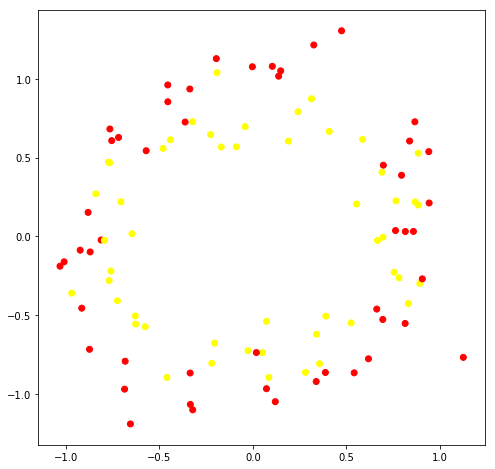

In [8]:
noisy_circles = datasets.make_circles(noise = 0.15)

plot_2d_dataset(noisy_circles, colors)

### datasets.make_classification

In [40]:
simple_classification_problem = datasets.make_classification(n_features = 2, #признаки
                                                             n_informative = 1, #информативные признаки
                                                             n_redundant = 1, #бесполезные признаки
                                                             n_classes=2, #количество классов
                                                             n_clusters_per_class = 1, 
                                                             random_state = 1 ) #число для генерации, чтобы можно было повторить вывод

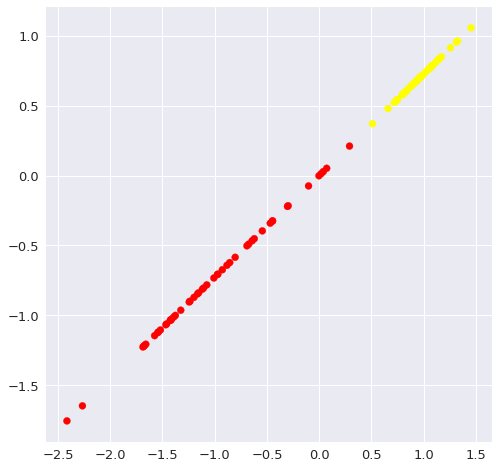

In [41]:
plot_2d_dataset(simple_classification_problem, colors)

Сгенерируем более сложную выборку

In [42]:
classification_problem = datasets.make_classification(n_features = 2,
                                                      n_informative = 2,
                                                      n_classes = 4, 
                                                      n_redundant = 0,
                                                      n_clusters_per_class = 1,
                                                      random_state = 1)

colors = ListedColormap(['red', 'blue', 'green', 'yellow'])

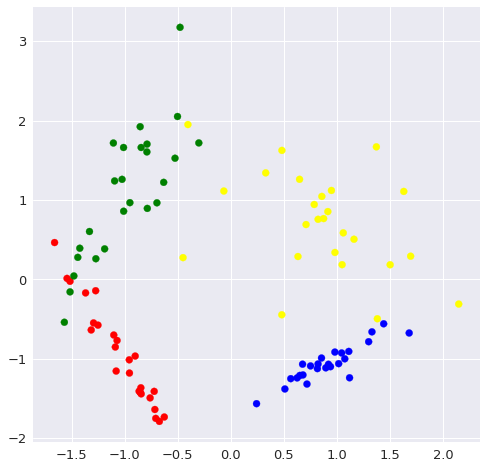

In [43]:
plot_2d_dataset(classification_problem, colors)

## "Игрушечные" наборы данных

Стандартные наборы данных для тренировок

**Наборы данных:** 
* load_iris 
* load_boston
* load_diabetes
* load_digits
* load_linnerud
* etc

### datasets.load_iris

In [44]:
iris = datasets.load_iris()

In [45]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

Выведем описания dataset'а

In [16]:
print (iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [46]:
print ("feature names: {}".format(iris.feature_names))
print ("target names: {names}".format(names = iris.target_names))

feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target names: ['setosa' 'versicolor' 'virginica']


In [18]:
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [47]:
iris.target[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#### Визуализация выбоки

In [20]:
from pandas import DataFrame

In [21]:
iris_frame = DataFrame(iris.data)
iris_frame.columns = iris.feature_names
iris_frame['target'] = iris.target

In [22]:
iris_frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


Заменим метку класса на называние

In [23]:
iris_frame.target = iris_frame.target.apply(lambda x : iris.target_names[x])

In [24]:
iris_frame.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Распределение первого признака

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5e02b95e10>]],
      dtype=object)

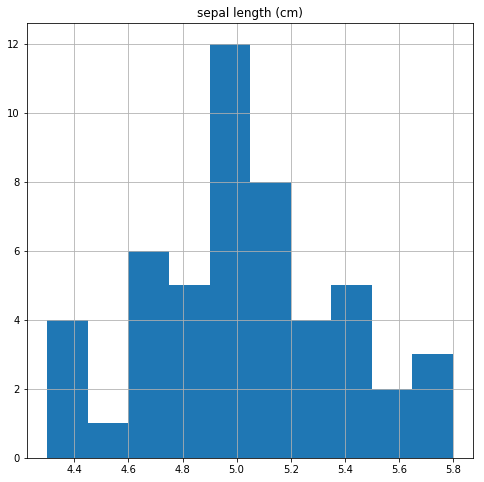

In [25]:
iris_frame[iris_frame.target == 'setosa'][['sepal length (cm)']].hist('sepal length (cm)')

Гистограмма всех признаков по всем классам

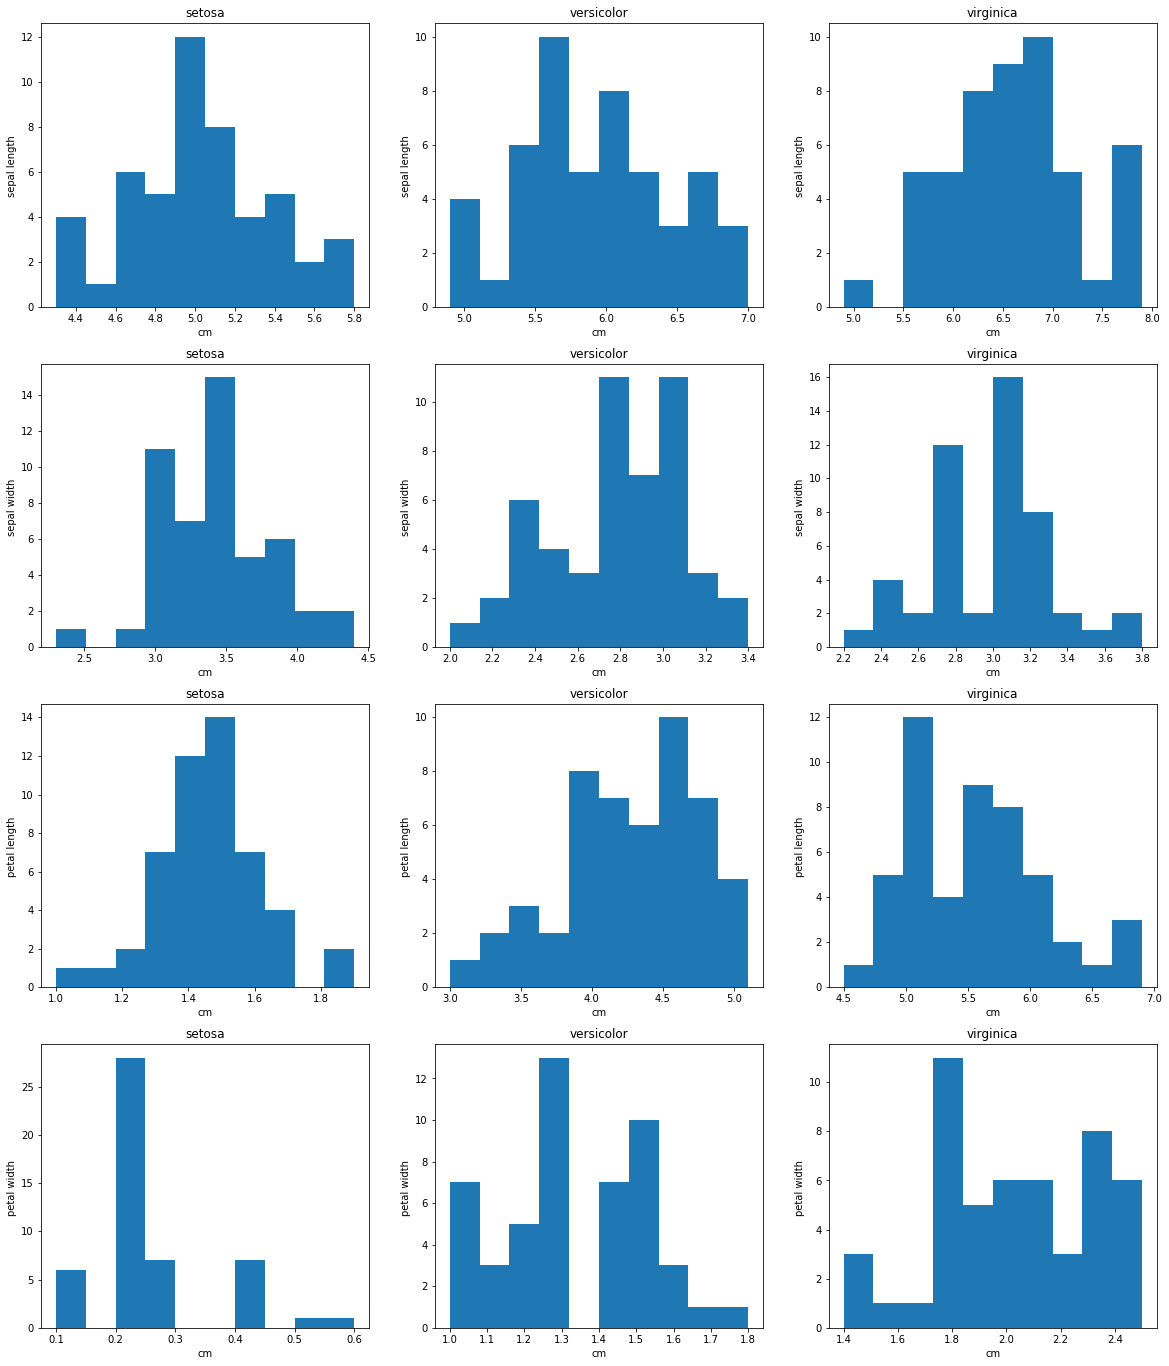

In [26]:
pyplot.figure(figsize(20, 24))

plot_number = 0
for feature_name in iris['feature_names']:
    for target_name in iris['target_names']:
        plot_number += 1
        pyplot.subplot(4, 3, plot_number)
        pyplot.hist(iris_frame[iris_frame.target == target_name][feature_name])
        pyplot.title(target_name)
        pyplot.xlabel('cm')
        pyplot.ylabel(feature_name[:-4])

### Бонус: библиотека seaborn

In [27]:
import seaborn as sns

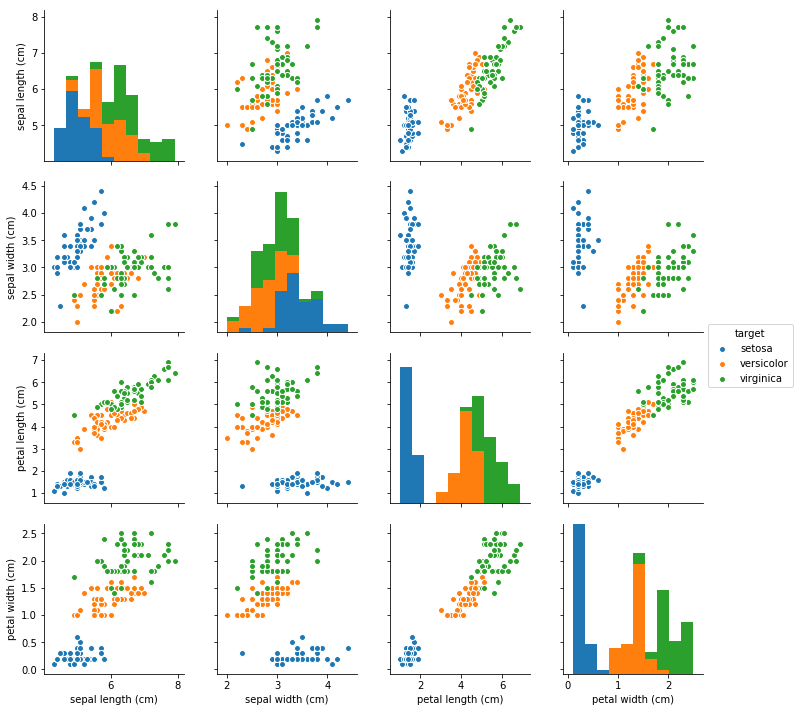

In [28]:
sns.pairplot(iris_frame,
             hue = 'target') #метка класса

Дополнительная настройка

In [29]:
?sns.set()

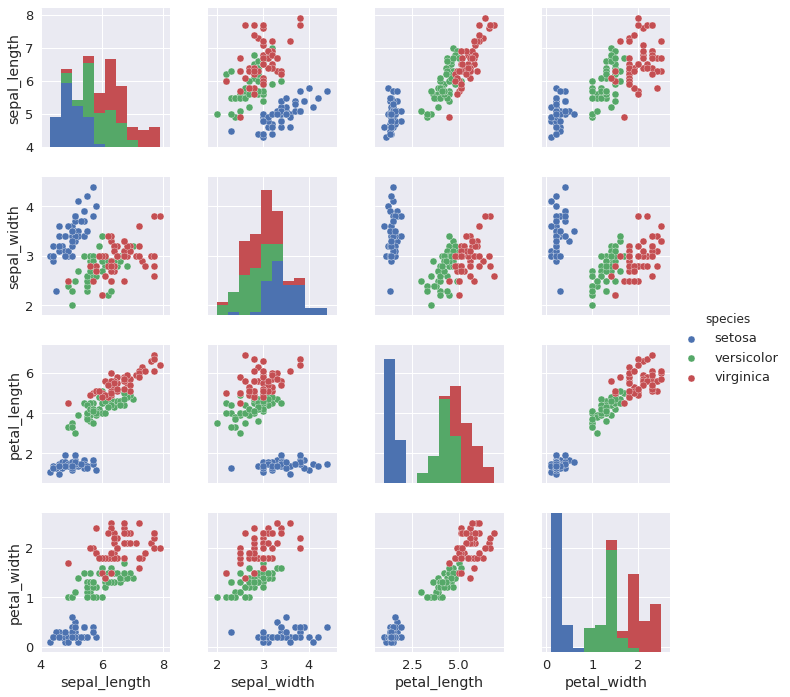

In [30]:
sns.set(font_scale = 1.3)
data = sns.load_dataset("iris") # можно импортировать сразу
sns.pairplot(data, hue = "species")

#### **Если Вас заинтересовала библиотека seaborn:**
* установка: https://stanford.edu/~mwaskom/software/seaborn/installing.html
* установка c помощью анаконды: https://anaconda.org/anaconda/seaborn
* руководство: https://stanford.edu/~mwaskom/software/seaborn/tutorial.html
* примеры: https://stanford.edu/~mwaskom/software/seaborn/examples/